In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import distinctipy as dpy
import colormaps as cmaps
import numpy as np

In [12]:
loss_path = "../data/plot_data/loss_scoring_test.csv"
loss_df = pd.read_csv(loss_path)

In [13]:
loss_df

,epoch,loss,reconstruction_loss,divergence_loss,test_loss,test_rec,test_div,epochs,batch_size,save_on,...,model_folder,dataset_size,join,refresh_data_on,save_losses_on,test_dataset,test_size,main_folder,losses_file,run
0,0,4080.729190,4063.072165,17.657008,3006.401105,2995.056415,11.344711,5,256,10,...,NaN,65536,inner,4,1,./data/samples/small_human_split/test/,2048,./data/models/test/,./data/models/test/losses.csv,0
1,1,3447.708705,3422.439590,25.269123,2911.448475,2898.994690,12.453801,5,256,10,...,NaN,65536,inner,4,1,./data/samples/small_human_split/test/,2048,./data/models/test/,./data/models/test/losses.csv,0
2,2,2944.769050,2910.029250,34.739806,2860.819900,2846.792290,14.027632,5,256,10,...,NaN,65536,inner,4,1,./data/samples/small_human_split/test/,2048,./data/models/test/,./data/models/test/losses.csv,0
3,3,2562.764955,2517.667185,45.097743,2849.168535,2834.163870,15.004662,5,256,10,...,NaN,65536,inner,4,1,./data/samples/small_human_split/test/,2048,./data/models/test/,./data/models/test/losses.csv,0
4,4,2261.164945,2204.794465,56.370444,2854.748940,2838.884765,15.864150,5,256,10,...,NaN,65536,inner,4,1,./data/samples/small_human_split/test/,2048,./data/models/test/,./data/models/test/losses.csv,0


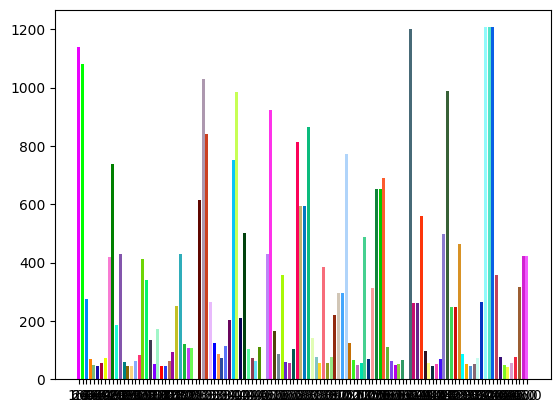

In [14]:
fix, ax = plt.subplots(1,1)

n_runs = len(loss_df)

n_emb = loss_df['n_emb']
loss = loss_df['reconstruction_loss']

x = range(n_runs)
colors = dpy.get_colors(n_runs)

ax.bar(x, loss, color=colors)
ax.set_xticks(x, n_emb)

plt.show()

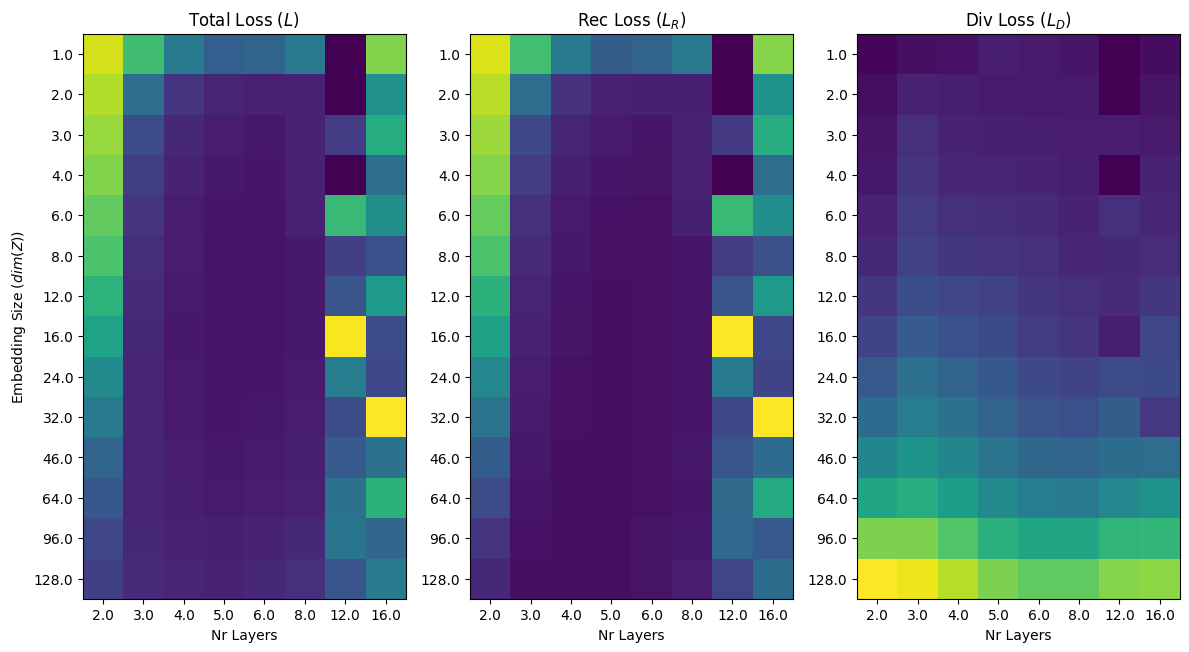

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,9))

n_embs = sorted(loss_df['n_emb'].unique())
n_lays = sorted(loss_df['n_lay'].unique())

n_n_emb = len(n_embs)
n_n_lay = len(n_lays)

losses = np.zeros((n_n_emb, n_n_lay))
r_losses = np.zeros((n_n_emb, n_n_lay))
d_losses = np.zeros((n_n_emb, n_n_lay))

for i, n_emb in enumerate(n_embs):
    i_df = loss_df[loss_df['n_emb'] == n_emb]
    for j, n_lay in enumerate(n_lays):
        ij_df = i_df[i_df['n_lay'] == n_lay]

        if len(ij_df) == 1:
            losses[i,j] = ij_df['loss'].sum()
            r_losses[i,j] = ij_df['reconstruction_loss'].sum()
            d_losses[i,j] = ij_df['divergence_loss'].sum()
        else:
            losses[i,j] = ij_df['loss'].mean()
            r_losses[i,j] = ij_df['reconstruction_loss'].mean()
            d_losses[i,j] = ij_df['divergence_loss'].mean()

        
ax1.imshow(losses)
ax1.set_yticks(range(n_n_emb), n_embs)
ax1.set_xticks(range(n_n_lay), n_lays)
ax1.set_xlabel("Nr Layers")
ax1.set_ylabel("Embedding Size ($dim(Z)$)")
ax1.set_title("Total Loss ($L$)")

ax2.imshow(r_losses)
ax2.set_yticks(range(n_n_emb), n_embs)
ax2.set_xticks(range(n_n_lay), n_lays)
ax2.set_xlabel("Nr Layers")
ax2.set_title("Rec Loss ($L_R$)")

ax3.imshow(d_losses)
ax3.set_yticks(range(n_n_emb), n_embs)
ax3.set_xticks(range(n_n_lay), n_lays)
ax3.set_xlabel("Nr Layers")
ax3.set_title("Div Loss ($L_D$)")

fig.tight_layout()